In [204]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

In [205]:
def f(y,t, A):
    omega = 1.01
    gamma = 0.01
    wj = 1
    y1, y2 = y #вводим имена новых функций
    return [y2,A*math.cos(omega*t)-gamma*y2-wj**2*math.sin(y1)]

In [206]:
t = np.linspace(0,5,1000)

In [207]:
y0 = [0.1,0.2] #начальные условия

In [208]:
A = 0.0
w1 = odeint(f, y0, t, args=(A,))
A = 0.1
w2 = odeint(f, y0, t, args=(A,))
A = 0.2
w3 = odeint(f, y0, t, args=(A,))
#A = 3
#w4 = odeint(f, y0, t, args=(A,))
#A = 4
#w5 = odeint(f, y0, t, args=(A,))
#A = 5
#w6 = odeint(f, y0, t, args=(A,))

In [209]:
w1

array([[ 0.1       ,  0.2       ],
       [ 0.10099972,  0.19948785],
       [ 0.10199686,  0.19897075],
       ...,
       [-0.16419383,  0.14523224],
       [-0.16346492,  0.14604126],
       [-0.16273197,  0.14684662]])

In [210]:
#A=0.0
y1 = w1[:,0] #вектор значений u
y2 = w1[:,1] #вектор значение u'

In [211]:
#A=0.1
y3 = w2[:,0] #вектор значений u
y4 = w2[:,1] #вектор значение u'

In [212]:
#A=0.3
y5 = w3[:,0] #вектор значений u
y6 = w3[:,1] #вектор значение u'

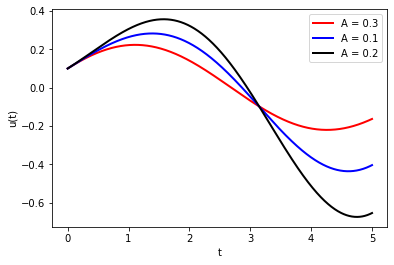

In [213]:
plt.plot(t,y1,'r-',linewidth=2, label = "A = 0.3")
plt.plot(t,y3,'b-',linewidth=2, label = "A = 0.1")
plt.plot(t,y5,'k-',linewidth=2, label = "A = 0.2")
plt.ylabel("u(t)")
plt.xlabel("t")
plt.legend()
plt.show()

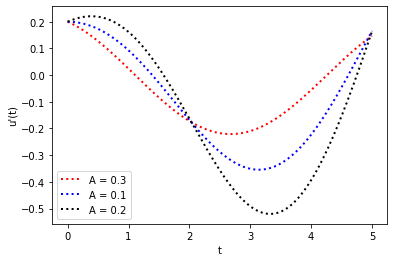

In [214]:
plt.plot(t,y2,'r:',linewidth=2, label = "A = 0.3")
plt.plot(t,y4,'b:',linewidth=2, label = "A = 0.1")
plt.plot(t,y6,'k:',linewidth=2, label = "A = 0.2")
plt.ylabel("u'(t)")
plt.xlabel("t")
plt.legend()
plt.show()

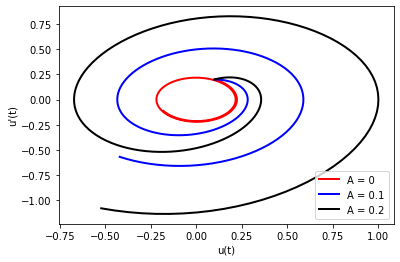

In [215]:
#график фазовой траектории
t = np.linspace (0,10,150)
A = 0.0
[y1,y2] = odeint(f, y0, t, args=(A,), full_output = False).T
A = 0.1
[y3,y4] = odeint(f, y0, t, args=(A,), full_output = False).T
A = 0.2
[y5,y6] = odeint(f, y0, t, args=(A,), full_output = False).T

plt.plot(y1,y2,'r-',linewidth=2, label = "A = 0")
plt.plot(y3,y4,'b-',linewidth=2, label = "A = 0.1")
plt.plot(y5,y6,'k-',linewidth=2, label = "A = 0.2")
plt.ylabel("u'(t)")
plt.xlabel("u(t)")
plt.legend()
plt.show()

In [216]:
#фурье преобразование спектр мощности
# Number of sample points
#N = 1000
# sample spacing
#T = 1.0 / 0.01
#x = np.linspace(0.0, N*T, N)
#y = w1
#yf = fft(y)
#xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#import matplotlib.pyplot as plt
#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#plt.grid()
#plt.show()

In [217]:
#Для y1 (А=0)
fft = np.fft.fft(y1)
for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))

Value at index 0:	(7.6708469851163885+4.345124447394525j) 
Value at index 149:	(7.6708469851163885-4.345124447394525j)
Value at index 1:	(-7.663276310624067-9.649406637395346j) 
Value at index 148:	(-7.663276310624067+9.649406637395346j)


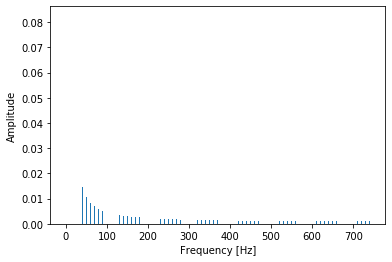

In [221]:
T = t[1] - t[0]  # sampling interval 
N = y1.size

# 1/T = frequency
f = np.linspace(0, 100 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()

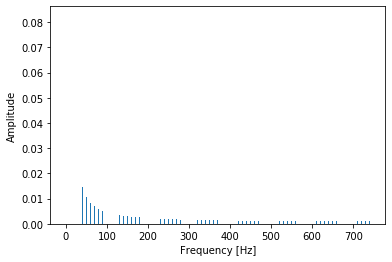

In [222]:
T = t[1] - t[0]  # sampling interval 
N = y3.size

# 1/T = frequency
f = np.linspace(0, 100 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()

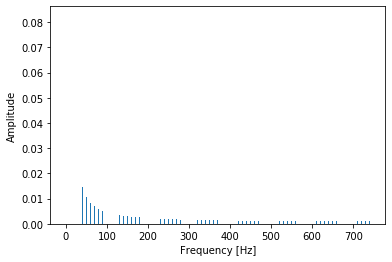

In [223]:
T = t[1] - t[0]  # sampling interval 
N = y5.size

# 1/T = frequency
f = np.linspace(0, 100 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()